In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [350]:
# importing first dataset

# Load the Excel file
transaction = pd.read_excel('QVI_transaction_data.xlsx')

# Display the first few rows
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [168]:
# chceck datatype
print(transaction.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [352]:
# converting excel date to datetime
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')
transaction.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [354]:
# Updated Date
transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [176]:
# Standardize columns for better viewing
transaction.columns = transaction.columns.str.lower().str.replace(' ', '_')

In [178]:
# Trim whitespace in product names
transaction['prod_name'] = transaction['prod_name'].str.strip()

In [180]:
# Sort data by date
transaction = transaction.sort_values(by='date')


In [356]:
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [206]:
# Check for missing values
missing_values1 = transaction.isnull().sum()
print(missing_values1)

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_qty          0
tot_sales         0
dtype: int64


In [212]:
transaction.describe()

,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [214]:
# Remove rows with invalid dates
transaction = transaction.dropna(subset=['date'])

In [230]:
transaction.shape

(264836, 10)

In [232]:
# Updated Date
print(transaction.dtypes)

date              datetime64[ns]
store_nbr                  int64
lylty_card_nbr             int64
txn_id                     int64
prod_nbr                   int64
prod_name                 object
prod_qty                   int64
tot_sales                float64
pack_size                  int64
brand                     object
dtype: object


In [358]:

# # Ensure 'prod_name' is treated as a string
# transaction['prod_name'] = transaction['prod_name'].astype(str)

# # Extract pack size and remove 'g'
# transaction['pack_size'] = transaction['prod_name'].str.extract(r'(\d+)').astype(int)

# # Remove pack size from prod_name
# transaction['prod_name'] = transaction['prod_name'].str.replace(r'\d+g', '', regex=True).str.strip()

transaction.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# ----------------------------------S E C O N D   D A T A S E T ---------------------------------------------

In [360]:
# Importing second Dataset
behaviour = pd.read_csv('QVI_purchase_behaviour.xlsx')
behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [198]:
# View all unique values in the 'PREMIUM_CUSTOMER' and 'LIFESTAGE' column
d2_values = behaviour['PREMIUM_CUSTOMER'].unique()
print(d2_values)

d2_values1 = behaviour['LIFESTAGE'].unique()
print(d2_values1)

['Premium' 'Mainstream' 'Budget']
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


In [208]:
# Check for missing values
missing_values2 = behaviour.isnull().sum()
print(missing_values2)

lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64


In [362]:

# Standardize column names
behaviour.columns = behaviour.columns.str.lower().str.replace(' ', '_')

# Remove whitespace from string columns
behaviour['lifestage'] = behaviour['lifestage'].str.strip()
behaviour['premium_customer'] = behaviour['premium_customer'].str.strip()

# Convert `premium_customer` to categorical type
behaviour['premium_customer'] = pd.Categorical(behaviour['premium_customer'], categories=['Budget', 'Mainstream', 'Premium'])

behaviour.head(5)


,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [366]:
 
# Merge both tables using lylty_card_nbr
# combined_df = pd.merge(transaction, behaviour, on='lylty_card_nbr', how='inner')

combined_df.head(7)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,pack_size,brand,lifestage,premium_customer
0,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-08-19,19,19205,16467,63,Kettle Swt Pot Sea Salt,2,8.4,135,Kettle,OLDER SINGLES/COUPLES,Mainstream
2,2018-09-18,19,19205,16468,88,Kettle Honey Soy Chicken,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
4,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
5,2018-11-07,124,124236,127985,65,Old El Paso Salsa Dip Chnky Tom Ht,1,5.1,300,Old,OLDER FAMILIES,Budget
6,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic,2,9.2,150,Kettle,RETIREES,Premium


In [372]:

# # Total sales by customer 
# total_sales = combined_df.groupby(['lifestage', 'premium_customer'])['tot_sales'].sum()

# # Average sales per transaction by customer 
# average_sales = combined_df.groupby(['lifestage', 'premium_customer'])['tot_sales'].mean()

# # Frequency of purchase by customer 
# frequency = combined_df.groupby(['lifestage', 'premium_customer'])['txn_id'].count()

print("Total Sales:\n", total_sales)
print("\nAverage Sales per Transaction:\n", average_sales)
print("\nFrequency of Purchase:\n", frequency)


Total Sales:
 lifestage               premium_customer
MIDAGE SINGLES/COUPLES  Budget               35514.80
                        Mainstream           90803.85
                        Premium              58432.65
NEW FAMILIES            Budget               21928.45
                        Mainstream           17013.90
                        Premium              11491.10
OLDER FAMILIES          Budget              168363.25
                        Mainstream          103445.55
                        Premium              81958.40
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132263.15
RETIREES                Budget              113147.80
                        Mainstream          155677.05
                        Premium              97646.05
YOUNG FAMILIES          Budget              139345.85
                        Mainstream           92788.75
                        Pre

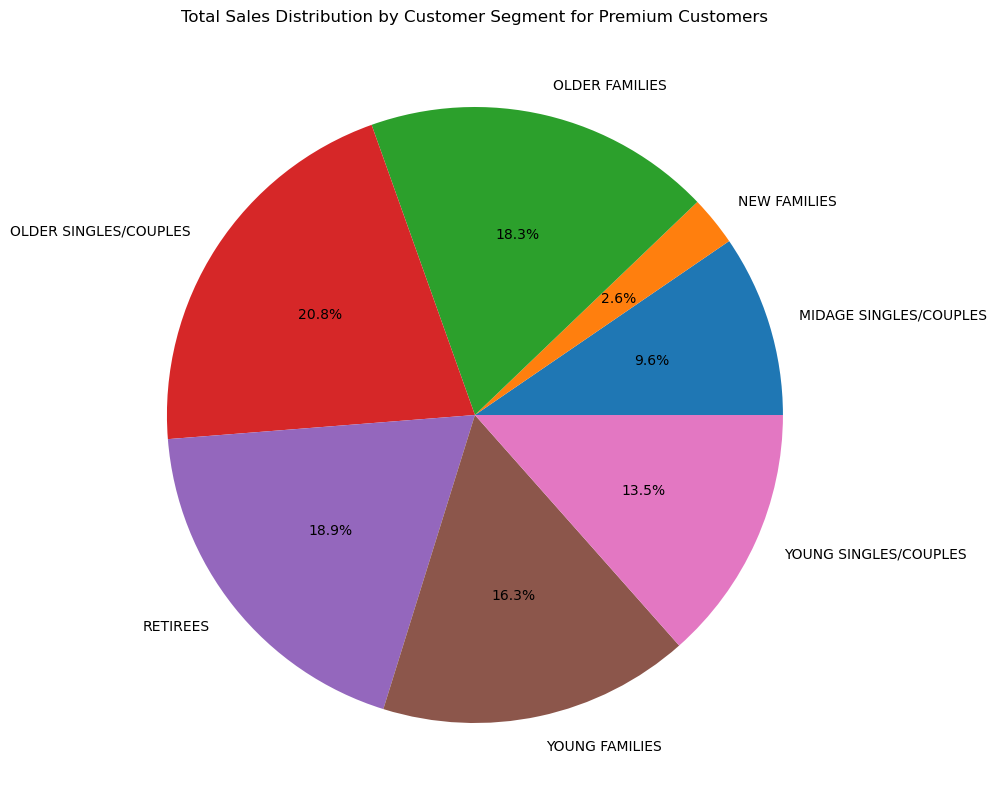

In [320]:
# Total sales by customer segment for Pie Chart
total_sales_pivot = combined_df.pivot_table(values='tot_sales', index='lifestage', columns='premium_customer', aggfunc='sum')

# Plotting Pie Chart for total sales
total_sales_pivot.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Total Sales Distribution by Customer Segment for Premium Customers')
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


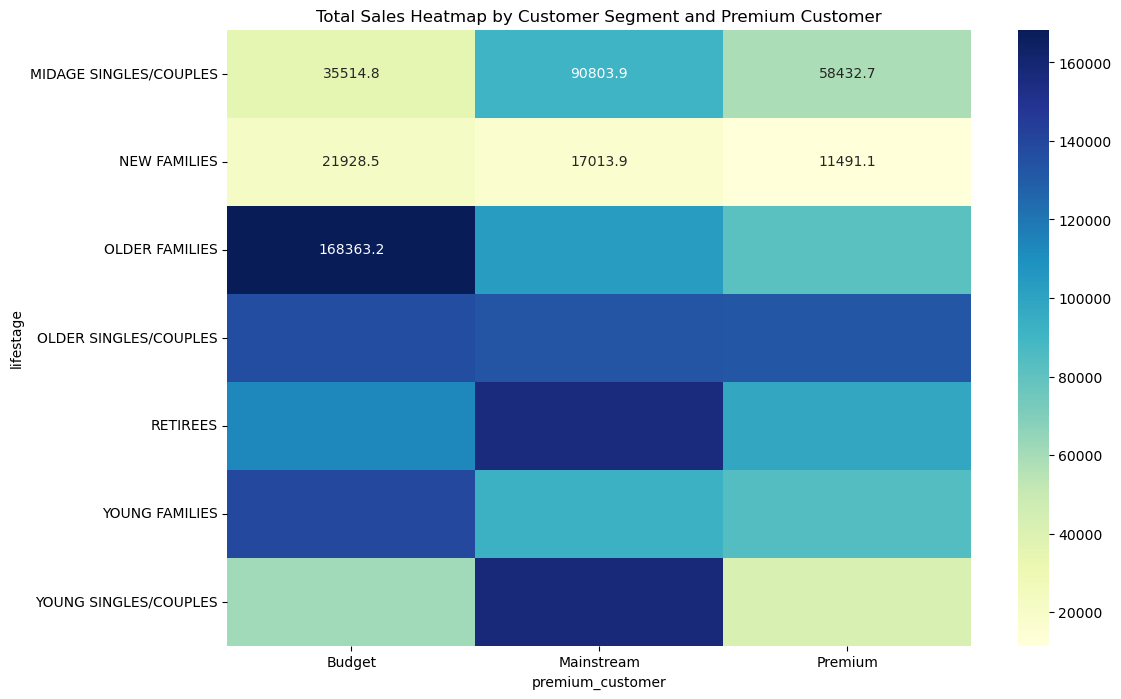

In [304]:
# Heatmap for total sales correlation
plt.figure(figsize=(12, 8))
sns.heatmap(total_sales_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Total Sales Heatmap by Customer Segment and Premium Customer')
plt.show()


In [374]:
# Extract the brand name
# transaction['brand'] = transaction['prod_name'].str.split().str[0]

transaction.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


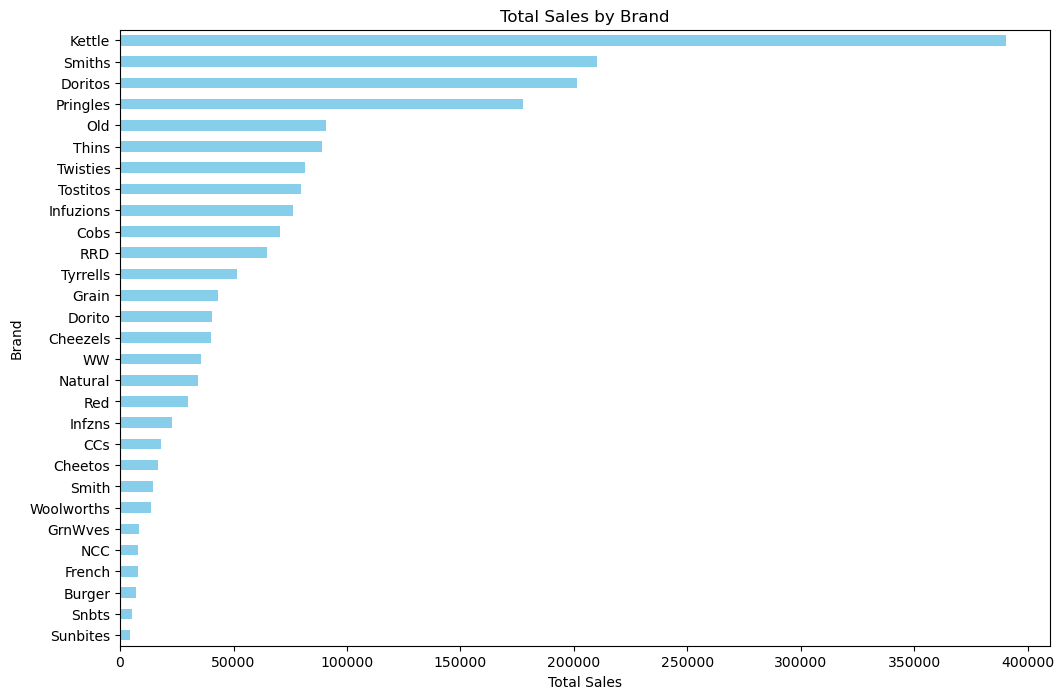

In [334]:
import matplotlib.pyplot as plt

# Calculate total sales by brand
total_sales_by_brand = combined_df.groupby('brand')['tot_sales'].sum()

# Sort the sales for better visualization
total_sales_by_brand = total_sales_by_brand.sort_values()

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
total_sales_by_brand.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Brand')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()


In [348]:
# Analysis example: Sales by brand within each customer segment
sales_by_brand = combined_df.groupby(['lifestage', 'brand'])['tot_sales'].sum()

print(sales_by_brand)


lifestage               brand     
MIDAGE SINGLES/COUPLES  Burger          660.1
                        CCs            1717.8
                        Cheetos        1499.7
                        Cheezels       4080.6
                        Cobs           6995.8
                                       ...   
YOUNG SINGLES/COUPLES   Tostitos      11149.6
                        Twisties      11653.7
                        Tyrrells       7413.0
                        WW             4095.8
                        Woolworths     1612.8
Name: tot_sales, Length: 203, dtype: float64
